# Data Processing

In [1]:
import sys
sys.path.insert(0, '../src')

In [2]:
from config import *
from data_utils import *
from torch.utils.data import DataLoader
from IPython.display import HTML

In [4]:
preprocess_raw_data(sample=100000)

100%|████████████████████████████████████████████████████████████████████████████| 94477/94477 [27:44<00:00, 56.76it/s]


Preprocessed data saved in C:\Users\tgdimas1\git\CAS-AML-FINAL-PROJECT\notebooks\../src\../data/processed/train_landmark_files.


In [5]:
remove_unusable_data()

100%|████████████████████████████████████████████████████████████████████████████| 94477/94477 [19:02<00:00, 82.72it/s]


In [11]:
from dataset import ASL_DATASET, label_dict_inference, label_dict

In [12]:
dataset = ASL_DATASET(augment=True)
dataset

ASL_DATASET(Participants: 21, Length: 70434

In [13]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
len(dataloader)

70434

In [14]:
from visualizations import visualize_target_sign

Generating ....
 Frame : 32: .................................

.

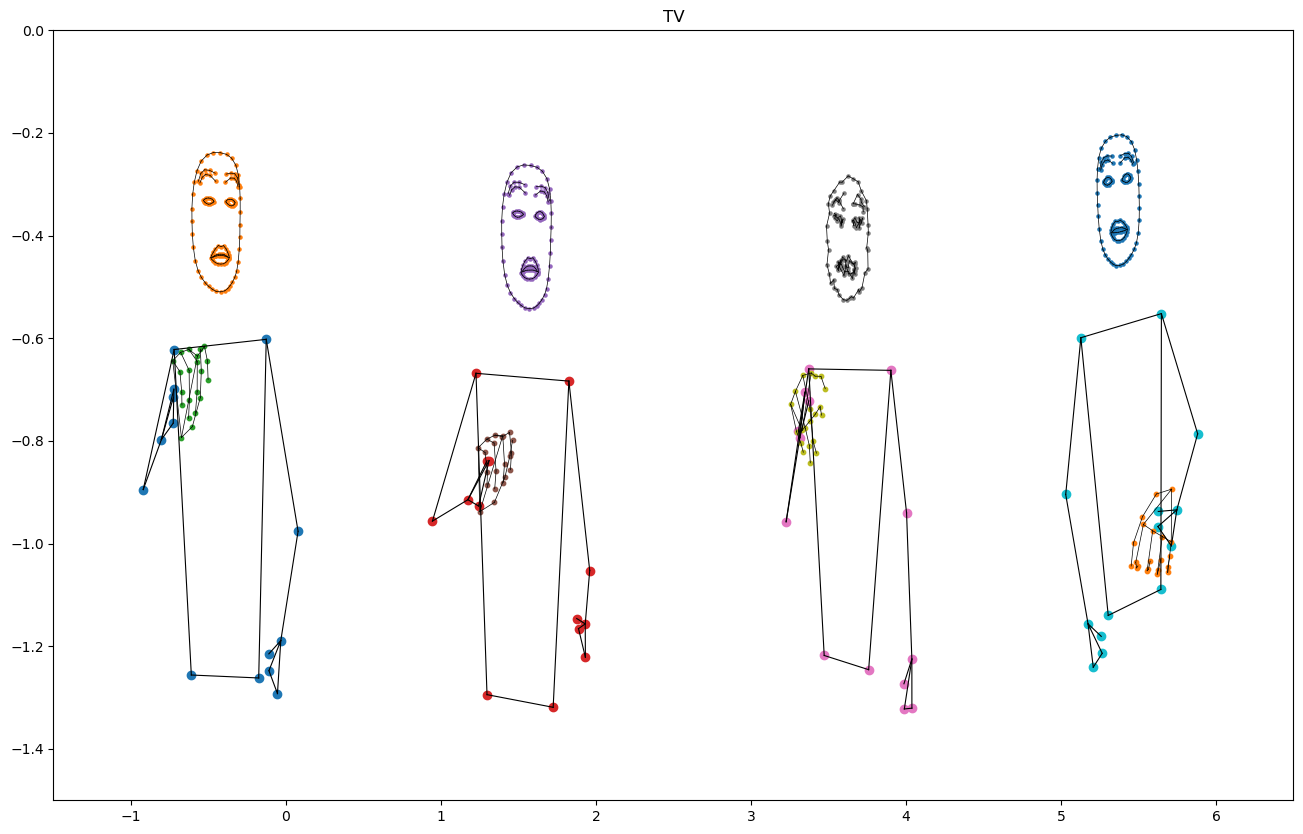

In [15]:
target_sign = 0
anim = visualize_target_sign(dataset,target_sign,n_samples=4)
HTML(anim.to_jshtml())

In [8]:
target_indices = []
n_samples=2
for i, sample in enumerate(dataset):
    if sample['target'] == target_sign:
        target_indices.append(i)
        print('.', end='')
        if len(target_indices) >= n_samples*10:
            break

....................

In [9]:
import random

random.seed(SEED)
selected_indices = random.sample(target_indices, min(n_samples, len(target_indices)))
selected_indices

[3524, 3661]

In [10]:
target = int(samples[0]['target'])
size = INPUT_SIZE

NameError: name 'samples' is not defined

In [35]:
size

30

In [ ]:
fig, ax = plt.subplots(1, figsize=(8 * len(samples) / 2, 10))

def update(frame):
        ax.cla()
        print('.', end='')

        for sample_idx, sample in enumerate(samples):

            frames = sample['landmarks']
            landmark_lists = frames[:size]

            landmark_offset = 192 * sample_idx

            # `landmark_lists` is a list containing sequence of mediapipe landmarks for face, left_hand, pose, and right_hand
            face_landmarks = landmark_lists[:, FACE_INDICES, :]
            left_hand_landmarks = landmark_lists[:, LEFT_HAND_INDICES, :]
            pose_landmarks = landmark_lists[:, POSE_INDICES, :]
            right_hand_landmarks = landmark_lists[:, RIGHT_HAND_INDICES, :]

            face_connections = mp.solutions.face_mesh_connections.FACEMESH_CONTOURS
            pose_connections = mp.solutions.pose.POSE_CONNECTIONS
            hand_connections = mp.solutions.hands.HAND_CONNECTIONS

            new_face_landmark_map = {x: i for i, x in enumerate(USEFUL_FACE_LANDMARKS)}
            face_connections = frozenset((new_face_landmark_map[x], new_face_landmark_map[y]) for (x, y) in face_connections if x in USEFUL_FACE_LANDMARKS and y in USEFUL_FACE_LANDMARKS)

            new_pose_landmark_map = {x: i for i, x in enumerate(USEFUL_POSE_LANDMARKS)}
            pose_connections = frozenset((new_pose_landmark_map[x], new_pose_landmark_map[y]) for (x, y) in pose_connections if x in USEFUL_POSE_LANDMARKS and y in USEFUL_POSE_LANDMARKS)

            face_x = [-float(x) + sample_idx * 2 for x in face_landmarks[frame][:, 0]]
            face_y = [-float(y) for y in face_landmarks[frame][:, 1]]
            pose_x = [-float(x) + sample_idx*2 for x in pose_landmarks[frame][:, 0]]
            pose_y = [-float(y)  for y in pose_landmarks[frame][:, 1]]
            lh_x   = [-float(x) + sample_idx*2 for x in left_hand_landmarks[frame][:, 0]]
            lh_y   = [-float(y)  for y in left_hand_landmarks[frame][:, 1]]
            rh_x   = [-float(x) + sample_idx*2 for x in right_hand_landmarks[frame][:, 0]]
            rh_y   = [-float(y)  for y in right_hand_landmarks[frame][:, 1]]

            ax.scatter(pose_x, pose_y)
            ax.scatter(face_x, face_y,s=5)
       
            for i in pose_connections:
                ax.plot([pose_x[i[0]], pose_x[i[1]]],[pose_y[i[0]], pose_y[i[1]]],color='k', lw=0.8)

            for i in face_connections:
                ax.plot([face_x[i[0]], face_x[i[1]]],[face_y[i[0]], face_y[i[1]]],color='k', lw=0.5)

            if round(float(left_hand_landmarks[frame][0, 0]),2)!=0.00 and round(float(left_hand_landmarks[frame][0, 1]),2)!=0.00:
                plt.scatter(lh_x, lh_y,s=10)
                for i in hand_connections:
                    ax.plot([lh_x[i[0]], lh_x[i[1]]],[lh_y[i[0]], lh_y[i[1]]],color='k', lw=0.5)

            if round(float(right_hand_landmarks[frame][0, 0]),2)!=0.00 and round(float(right_hand_landmarks[frame][0, 1]),2)!=0.00:
                plt.scatter(rh_x, rh_y,s=10)
                for i in hand_connections:
                    ax.plot([rh_x[i[0]], rh_x[i[1]]],[rh_y[i[0]], rh_y[i[1]]],color='k', lw=0.5)
                        
        ax.set_ylim(-1.5,0.0)
        ax.set_xlim(-1.5, (len(samples)-1)*2 + 0.5)
        
        ax.set_title(label_dict_inference[target])

    animation = FuncAnimation(fig, update, frames=size, interval=50)
    print(f'\n Frame : {size}: ', end='')